# Prueba de modelo pre entrenado

In [12]:
from IPython.display import Image
from imageai.Detection import ObjectDetection
detector = ObjectDetection()
model_path = "./modelo/yolo.h5"
input_path = "./entrada/test45.jpg"
output_path = "./salida/newimage.jpg"

## Yolo

In [8]:
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.loadModel()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
detection=detector.detectObjectsFromImage(input_image=input_path,output_image_path=output_path)

In [11]:
#for i in detection:
#    print(i["name"]," : ",i["percentage_probability"])

Imagen entrada


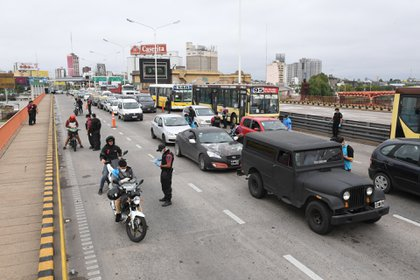

In [18]:
print("Imagen entrada")
Image(filename=input_path) 

Imagen salida


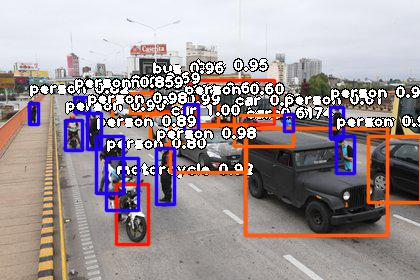

In [17]:
print("Imagen salida")
Image(filename=output_path) 

# Tiny Yolo

# Red propia

## Entreno la red

In [24]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="resistor")
trainer.setTrainConfig(object_names_array=["resistor"], batch_size=4, num_experiments=10, train_from_pretrained_model="modelo/yolo.h5")

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.72
Anchor Boxes generated.
Detection configuration saved in  resistor\json\detection_config.json


In [25]:
trainer.trainModel()

Training on: 	['resistor']
Training with Batch Size:  4
Number of Experiments:  10
Training with transfer learning from pretrained Model


D:\Instalado\anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/10
152/152 [==============================] - 2073s 14s/step - loss: 108.6598 - yolo_layer_4_loss: 13.4530 - yolo_layer_5_loss: 30.9831 - yolo_layer_6_loss: 64.2237
Epoch 2/10
152/152 [==============================] - 1933s 13s/step - loss: 50.3418 - yolo_layer_4_loss: 10.8386 - yolo_layer_5_loss: 12.0049 - yolo_layer_6_loss: 27.4982
Epoch 3/10
152/152 [==============================] - 1779s 12s/step - loss: 29.6641 - yolo_layer_4_loss: 8.3976 - yolo_layer_5_loss: 7.1694 - yolo_layer_6_loss: 14.0971
Epoch 4/10
152/152 [==============================] - 2113s 14s/step - loss: 24.1179 - yolo_layer_4_loss: 7.4807 - yolo_layer_5_loss: 6.5290 - yolo_layer_6_loss: 10.1082
Epoch 5/10
152/152 [==============================] - 1785s 12s/step - loss: 22.7663 - yolo_layer_4_loss: 6.6237 - yolo_layer_5_loss: 6.1912 - yolo_layer_6_loss: 9.9514
Epoch 6/10
152/152 [==============================] - 1640s 11s/step - loss: 21.5512 - yolo_layer_4_loss: 5.7792 - yolo_layer_5_loss: 5.7213 - yol

## Prueba la red

1297s

In [23]:
from imageai.Detection.Custom import CustomObjectDetection
print("Instanciamos el objeto detector")
detector = CustomObjectDetection()
print("Seteamos el tipo de modelo")
detector.setModelTypeAsYOLOv3()
detector.setModelPath("detection_model.h5")
detector.setJsonPath("detection_config.json")
print("Cargando modelo")
detector.loadModel()
print("Analizando imagen")
detections = detector.detectObjectsFromImage(input_image="4.jpg", output_image_path="4_out.jpg")
print("Resultados")
for detection in detections: 
        print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

Instanciamos el objeto detector
Seteamos el tipo de modelo
Cargando modelo
Analizando imagen
Resultados
resistor  :  53.37989330291748  :  [45, 48, 62, 77]
resistor  :  67.40254759788513  :  [63, 53, 77, 72]
resistor  :  62.83136010169983  :  [75, 50, 93, 74]
resistor  :  64.24932479858398  :  [93, 52, 109, 73]
resistor  :  56.47976994514465  :  [111, 53, 125, 72]
resistor  :  55.66103458404541  :  [127, 49, 144, 76]
resistor  :  65.53519368171692  :  [145, 54, 159, 71]
resistor  :  63.30406665802002  :  [157, 48, 176, 76]
resistor  :  54.61839437484741  :  [174, 51, 192, 74]
resistor  :  55.028122663497925  :  [60, 142, 71, 165]
resistor  :  68.90571117401123  :  [71, 143, 87, 163]
resistor  :  53.21478247642517  :  [85, 134, 101, 171]
resistor  :  61.64844632148743  :  [89, 144, 103, 162]
resistor  :  60.85535287857056  :  [101, 139, 119, 167]
resistor  :  57.84802436828613  :  [117, 139, 137, 167]
resistor  :  52.77612805366516  :  [142, 142, 153, 165]
resistor  :  70.54672241210938